# Experiment to analyze the percentage of students which special educaitonal needs

The used data set contains Gender information but just reaches back until 2014

## Plot the percentage of students which special educaitonal needs for all school types

In [13]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()



def load_special_edu_support_percentage(ignore_special_schools=False):
    
    students_special_support = loader.load('students_with_special_educational_support')
    students_special_support = students_special_support.dropna()
    students_special_support['year'] = pd.to_datetime(students_special_support['year'], format='%Y')
    students_special_support['total'] = pd.to_numeric(students_special_support['total'], errors='coerce')
    students_special_support['male'] = pd.to_numeric(students_special_support['male'], errors='coerce')
    students_special_support['female'] = pd.to_numeric(students_special_support['female'], errors='coerce')

    if(ignore_special_schools):
        students_special_support = students_special_support[students_special_support['school']!="Special schools"] #filter out because their amount is so hight, we can't see the evolution of the other schools

    total_over_years = students_special_support.groupby(['year','school'], as_index=False)[['male','female']].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})    
    
    children_type = children_type.rename(columns={'Students': 'Value'})
    
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')

    child_amount_per_year = children_type.groupby(['year','school', 'Gender'], as_index=False)['Value'].sum()

    pivot_table = child_amount_per_year.pivot_table(
    values='Value', 
    index=['year', 'school'], 
    columns='Gender', 
    aggfunc='sum'
    ).reset_index()

    pivot_table.columns = ['year', 'school', 'female_count', 'male_count', 'total_count']
    child_amount_per_year = pivot_table

    merged_df = pd.merge(total_over_years, child_amount_per_year, on=['year', 'school'])
    merged_df['relative_male'] = merged_df['male']/merged_df['male_count'] 
    merged_df['relative_female'] = merged_df['female']/merged_df['female_count'] 
    return merged_df

merged_df = load_special_edu_support_percentage()
merged_df[merged_df['school']=='Special schools']

,year,school,male,female,female_count,male_count,total_count,relative_male,relative_female
9,2014-01-01,Special schools,209924.0,114621.0,112126.0,200407.0,312533.0,1.047488,1.022252
19,2015-01-01,Special schools,202592.0,109296.0,106986.0,193525.0,300511.0,1.046852,1.021592
29,2016-01-01,Special schools,200281.0,106639.0,104826.0,191412.0,296238.0,1.046335,1.017295
39,2017-01-01,Special schools,200648.0,105783.0,103956.0,191521.0,295477.0,1.047655,1.017575
49,2018-01-01,Special schools,203211.0,106569.0,104832.0,193857.0,298689.0,1.048252,1.016569
59,2019-01-01,Special schools,206025.0,107829.0,105975.0,196446.0,302418.0,1.048761,1.017495
69,2020-01-01,Special schools,208023.0,109098.0,106803.0,197634.0,304443.0,1.052567,1.021488
79,2021-01-01,Special schools,210458.0,111338.0,109560.0,200066.0,309623.0,1.051943,1.016229
89,2022-01-01,Special schools,213193.0,113515.0,112497.0,203500.0,315993.0,1.047631,1.009049


## Plot the percentage of students which special educaitonal needs for all school types except special schools, beacuse the have significant higher values

c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to s

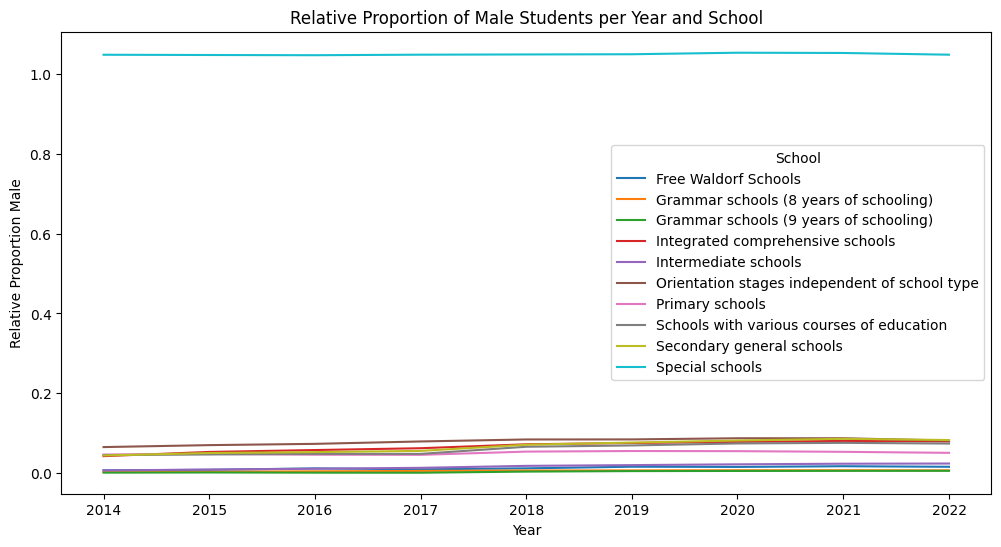

c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to s

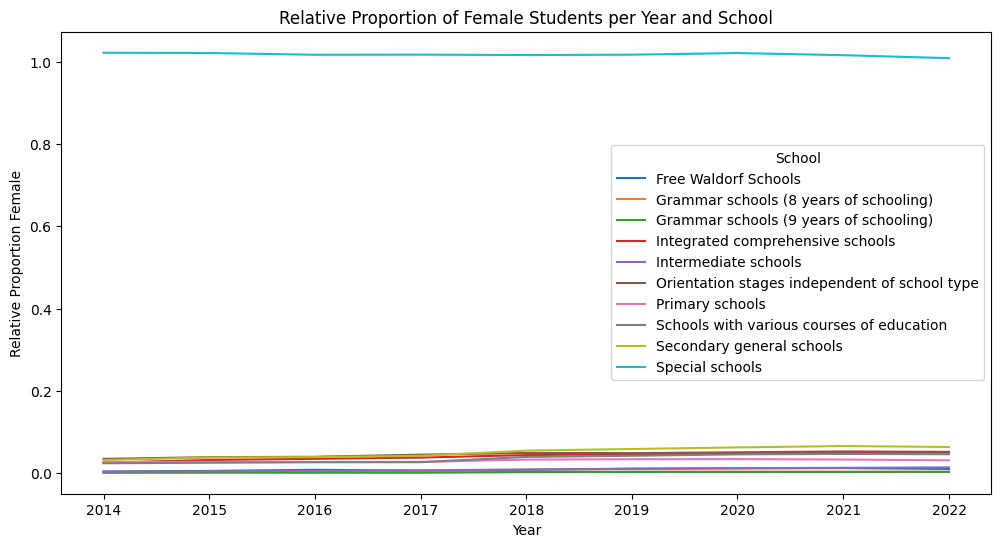

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Jetzt können Sie die Visualisierung durchführen


plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_male', hue='school', data=merged_df)
plt.title('Relative Proportion of Male Students per Year and School')
plt.xlabel('Year')
plt.ylabel('Relative Proportion Male')
plt.legend(title='School')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_female', hue='school', data=merged_df)
plt.title('Relative Proportion of Female Students per Year and School')
plt.xlabel('Year')
plt.ylabel('Relative Proportion Female')
plt.legend(title='School')

plt.show()

It's ovious that for special schools the proportion is over 100%. The used values are double checked, so it's likely that the two merged datasets are not complitely consistent. Furthermore all students in Special Schools seem to be categorized as students with special educaitonal support.

c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to s

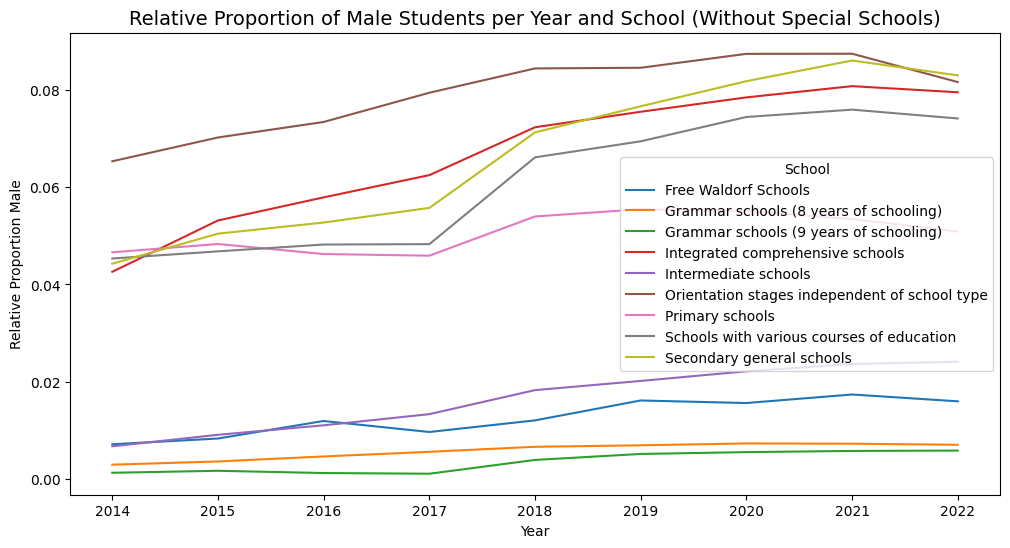

c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jonas\OneDrive\Documents\Master Studium\DataLiteracyWS23\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to s

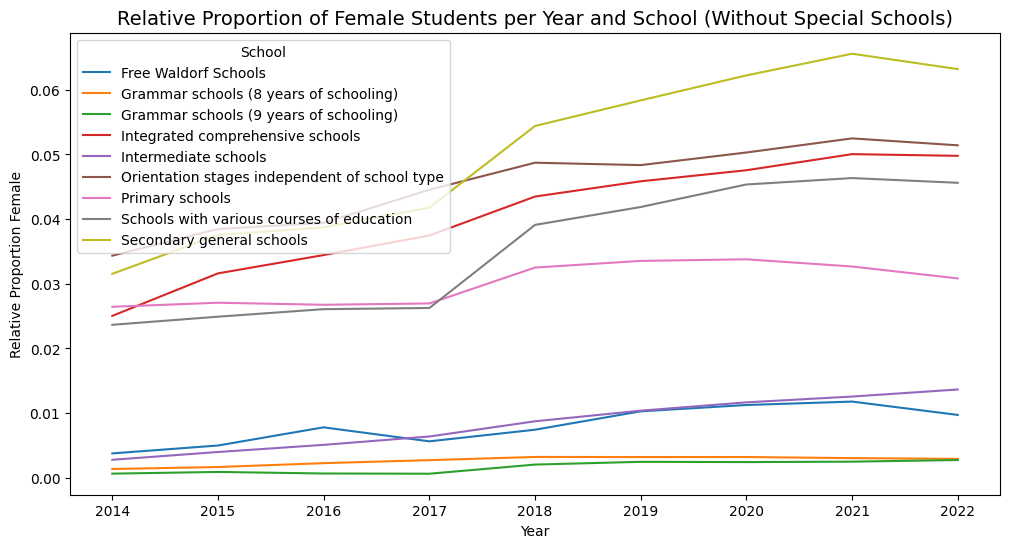

In [12]:
merged_df = load_special_edu_support_percentage(ignore_special_schools=True)

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_male', hue='school', data=merged_df)
plt.title('Relative Proportion of Male Students per Year and School (Without Special Schools)',fontsize=14)
plt.xlabel('Year')
plt.ylabel('Relative Proportion Male')
plt.legend(title='School')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_female', hue='school', data=merged_df)
plt.title('Relative Proportion of Female Students per Year and School (Without Special Schools)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Relative Proportion Female')
plt.legend(title='School')

plt.show()